# Disease Classification using Machine Learning

First, the required libary imports.

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import tensorflow as tf
import keras
import os

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif


## Part One: Data Visualization and Preprocessing
First we load the data and visualize it.

In [70]:
df_train = pd.read_csv('dataset/Training.csv')
df_test = pd.read_csv('dataset/Testing.csv')

df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [71]:
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


Next, we check if there are unexpected data alongside some more visualization.

In [72]:
df_train.drop(columns='Unnamed: 133', inplace=True)
df_train.isnull().sum()
df_train['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

Our prognosis is a string, which won't be accepted by the machine learning algorithms. We need to convert it to a number. We can do this by using the LabelEncoder class from the sklearn library.

In [73]:
le = preprocessing.LabelEncoder()
df_train['prognosis'] = le.fit_transform(df_train['prognosis'])
df_test['prognosis'] = le.fit_transform(df_test['prognosis'])
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


Now, time to split up the data into features and labels. 

In [74]:
x_train = df_train.drop(columns='prognosis')
y_train = df_train['prognosis']

x_test = df_test.drop(columns='prognosis')
y_test = df_test['prognosis']

Then we also split the data into training and validation sets.

In [75]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle = True)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(3936, 132)
(984, 132)
(42, 132)


## Part Two: Models
 
Now that we have our datasets, we will start off with a simple Logistic Regression Trainer

In [76]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(x_train, y_train)

print('LogisticRegressionModel Train Score is : ',
      LogisticRegressionModel.score(x_train, y_train))
print('LogisticRegressionModel Test Score is : ',
      LogisticRegressionModel.score(x_test, y_test))


LogisticRegressionModel Train Score is :  1.0
LogisticRegressionModel Test Score is :  1.0


1.0 Score means the model is 100% accurate. This is suspicious, so we will check the confusion matrix real quick then move on to another model.

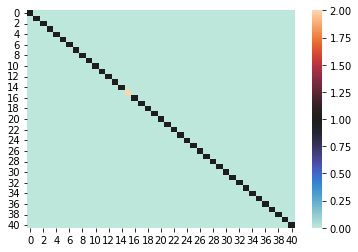

Confusion Matrix is
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [77]:
y_pred_LR = LogisticRegressionModel.predict(x_test)
CM_LR = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(CM_LR, center=True)
plt.show()
print('Confusion Matrix is\n', CM_LR)

Model Number Two: Random Forest Classifier

In [78]:
RandomForestClassifierModel = RandomForestClassifier(criterion='entropy',
                                                     max_depth=14,
                                                     n_estimators=100,
                                                     random_state=44)
RandomForestClassifierModel.fit(x_train, y_train)

print('RandomForestClassifierModel Train Score is : ',
      RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ',
      RandomForestClassifierModel.score(x_test, y_test))


RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  1.0


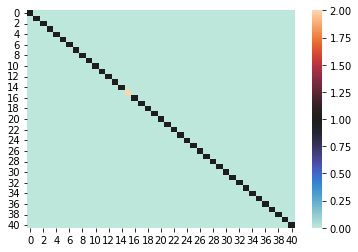

In [79]:
y_pred_RF = RandomForestClassifierModel.predict(x_test)
CM_RF = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

Once is a coicidence, twice is a pattern. We will check with another model: Gradient Boosting Model.

In [80]:
GBCModel = GradientBoostingClassifier(n_estimators=100,
                                      max_depth=5,
                                      learning_rate=0.1,
                                      random_state=44)
GBCModel.fit(x_train, y_train)
print('GBCModel Train Score is : ', GBCModel.score(x_train, y_train))
print('GBCModel Test Score is : ', GBCModel.score(x_test, y_test))


GBCModel Train Score is :  1.0
GBCModel Test Score is :  0.9761904761904762


Finally! A model that does not have 100% accuracy. We will check the confusion matrix for this one as well.

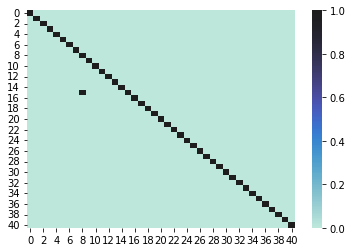

In [87]:
y_pred_GB = GBCModel.predict(x_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, center=True)
plt.show()

Last Model: Decision Tree Classifier

In [85]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=41,
                                                     random_state=44)
DecisionTreeClassifierModel.fit(x_train, y_train)

print('DecisionTreeClassifierModel Train Score is : ',
      DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ',
      DecisionTreeClassifierModel.score(x_test, y_test))


DecisionTreeClassifierModel Train Score is :  1.0
DecisionTreeClassifierModel Test Score is :  0.9761904761904762


Same exact test score as the Gradient Boosting Model. We will check the confusion matrix for this one as well.

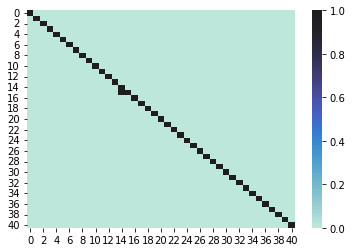

In [86]:
y_pred_DT = DecisionTreeClassifierModel.predict(x_test)
CM_DT = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(CM_DT, center=True)
plt.show()

One Final Model: Voting Classifier

In [89]:
VotingClassifierModel = VotingClassifier(estimators=[
    ('LRModel', LogisticRegressionModel), ('GBCModel', GBCModel),
    ('RFCModel', RandomForestClassifierModel),
    ('TDCModel', DecisionTreeClassifierModel)
],
                                         voting='hard')
VotingClassifierModel.fit(x_train, y_train)
print('VotingClassifierModel Train Score is : ',
      VotingClassifierModel.score(x_train, y_train))
print('VotingClassifierModel Test Score is : ',
      VotingClassifierModel.score(x_test, y_test))


VotingClassifierModel Train Score is :  1.0
VotingClassifierModel Test Score is :  1.0


Honestly not sure why I expected it to be different.